In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
employers = pd.read_csv('Attrition_dataset.csv', sep=';')
cities = pd.read_csv('Cities_map.csv', sep=';')

In [3]:
print(employers.head())

   Emp_ID      MMM.YY  Age        Salary LastWorkingDate  Designation  \
0       1  01.01.2016   28  57387,00 USD             NaN            1   
1       1  01.02.2016   28  57387,00 USD             NaN            1   
2       1  01.03.2016   28  57387,00 USD      11.03.2016            1   
3       2  01.11.2017   31  67016,00 USD             NaN            2   
4       2  01.12.2017   31  67016,00 USD             NaN            2   

   Total.Business.Value  Quarterly.Rating Gender City Education_Level  \
0               2381060                 2   Male  C23          MASTER   
1               -665480                 2   Male  C23          MASTER   
2                     0                 2   Male  C23          MASTER   
3                     0                 1   Male   C7          Master   
4                     0                 1   Male   C7          Master   

  Dateofjoining  Joining.Designation  
0    24.12.2015                    1  
1    24.12.2015                    1  
2    

In [4]:
print(cities.head())

  City_ID  City_Name
0     C01     Austin
1     C02     Boston
2     C03  Charlotte
3     C04    Chicago
4     C05   Columbus


In [5]:
employers.rename(columns={
    'Emp_ID': 'ID',
    'MMM.YY': 'Day of Month Rate',
    'LastWorkingDate': 'Last Working Date',
    'Total.Business.Value': 'Total Business Value',
    'Quarterly.Rating': 'Quarterly Rating',
    'Education_Level': 'Education Level',
    'Dateofjoining': 'Date of Joining',
    'Joining.Designation':'Joining Designation'
}, inplace=True)

In [6]:
print(employers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19190 entries, 0 to 19189
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    19190 non-null  int64 
 1   Day of Month Rate     19190 non-null  object
 2   Age                   19190 non-null  int64 
 3   Salary                19190 non-null  object
 4   Last Working Date     1628 non-null   object
 5   Designation           19190 non-null  int64 
 6   Total Business Value  19190 non-null  int64 
 7   Quarterly Rating      19190 non-null  int64 
 8   Gender                19190 non-null  object
 9   City                  19190 non-null  object
 10  Education Level       19190 non-null  object
 11  Date of Joining       19190 non-null  object
 12  Joining Designation   19190 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 1.9+ MB
None


In [7]:
employers.describe(include='all')

,ID,Day of Month Rate,Age,Salary,Last Working Date,Designation,Total Business Value,Quarterly Rating,Gender,City,Education Level,Date of Joining,Joining Designation
count,19190.000000,19190,19190.000000,19190,1628,19190.000000,1.919000e+04,19190.000000,19190,19190,19190,19190,19190.000000
unique,NaN,24,NaN,2383,493,NaN,NaN,NaN,2,29,6,869,NaN
top,NaN,01.01.2016,NaN,"48747,00 USD",29.07.2017,NaN,NaN,NaN,Male,C20,Bachelor,23.07.2012,NaN
freq,NaN,1025,NaN,57,71,NaN,NaN,NaN,11151,1014,5551,194,NaN
mean,1416.239083,NaN,34.649192,NaN,NaN,2.252579,5.710257e+05,2.008963,NaN,NaN,NaN,NaN,1.690412
std,810.866259,NaN,6.264600,NaN,NaN,1.026329,1.126591e+06,1.009839,NaN,NaN,NaN,NaN,0.836580
min,1.000000,NaN,21.000000,NaN,NaN,1.000000,-6.000000e+06,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,712.000000,NaN,30.000000,NaN,NaN,1.000000,0.000000e+00,1.000000,NaN,NaN,NaN,NaN,1.000000
50%,1417.500000,NaN,34.000000,NaN,NaN,2.000000,2.500000e+05,2.000000,NaN,NaN,NaN,NaN,1.000000
75%,2139.000000,NaN,39.000000,NaN,NaN,3.000000,6.995850e+05,3.000000,NaN,NaN,NaN,NaN,2.000000


In [8]:
print(employers['Education Level'])

0            MASTER
1            MASTER
2            MASTER
3            Master
4            Master
            ...    
19185        Colege
19186        Master
19187      Bachelor
19188    Bachelor's
19189        Master
Name: Education Level, Length: 19190, dtype: object


In [9]:
employers['Education Level'] = employers['Education Level'].apply(lambda x: 'Master' if x[0]== 'M' else ('College' if x[0]=='C' else 'Bachelor'))

In [10]:
employers['Salary'] = employers['Salary'].apply(lambda x: float(x.strip(' USD').replace(',','.')))

print(employers['Salary'])

0         57387.0
1         57387.0
2         57387.0
3         67016.0
4         67016.0
           ...   
19185     38619.0
19186     62292.0
19187     85688.0
19188    111507.0
19189    102822.0
Name: Salary, Length: 19190, dtype: float64


In [11]:
employers['Education Level'].nunique()

3

In [12]:
df = pd.merge(employers, cities.rename(
columns={
    'City_ID': 'City'
}))

In [13]:
print(df)

         ID Day of Month Rate  Age   Salary Last Working Date  Designation  \
0         1        01.01.2016   28  57387.0               NaN            1   
1         1        01.02.2016   28  57387.0               NaN            1   
2         1        01.03.2016   28  57387.0        11.03.2016            1   
3        12        01.07.2016   35  28116.0               NaN            1   
4        12        01.08.2016   35  28116.0               NaN            1   
...     ...               ...  ...      ...               ...          ...   
13639  1763        01.01.2017   22  33042.0        21.01.2017            1   
13640  1161        01.10.2017   30  67371.0               NaN            3   
13641  1746        01.01.2016   49  38478.0               NaN            2   
13642  1043        01.05.2017   33  93121.0               NaN            3   
13643  1606        01.09.2016   43  99127.0               NaN            3   

       Total Business Value  Quarterly Rating  Gender City Educ

In [14]:
df.drop('City', inplace=True, axis=1)

In [15]:
df.rename(columns={
    'City_Name': 'City'
}, inplace=True)

In [16]:
print(df.head())

   ID Day of Month Rate  Age   Salary Last Working Date  Designation  \
0   1        01.01.2016   28  57387.0               NaN            1   
1   1        01.02.2016   28  57387.0               NaN            1   
2   1        01.03.2016   28  57387.0        11.03.2016            1   
3  12        01.07.2016   35  28116.0               NaN            1   
4  12        01.08.2016   35  28116.0               NaN            1   

   Total Business Value  Quarterly Rating Gender Education Level  \
0               2381060                 2   Male          Master   
1               -665480                 2   Male          Master   
2                     0                 2   Male          Master   
3                500000                 4   Male          Master   
4               1707180                 4   Male          Master   

  Date of Joining  Joining Designation      City  
0      24.12.2015                    1  Portland  
1      24.12.2015                    1  Portland  
2    

In [17]:
df.loc[:, ['Day of Month Rate', 'ID', 'Age', 'Gender', 'City', 'Education Level', 'Salary', 'Date of Joining', 'Last Working Date', 'Joining Designation', 'Designation', 'Total Business Value', 'Quarterly Rating']]

,Day of Month Rate,ID,Age,Gender,City,Education Level,Salary,Date of Joining,Last Working Date,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,01.01.2016,1,28,Male,Portland,Master,57387.0,24.12.2015,NaN,1,1,2381060,2
1,01.02.2016,1,28,Male,Portland,Master,57387.0,24.12.2015,NaN,1,1,-665480,2
2,01.03.2016,1,28,Male,Portland,Master,57387.0,24.12.2015,11.03.2016,1,1,0,2
3,01.07.2016,12,35,Male,Portland,Master,28116.0,29.06.2016,NaN,1,1,500000,4
4,01.08.2016,12,35,Male,Portland,Master,28116.0,29.06.2016,NaN,1,1,1707180,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13639,01.01.2017,1763,22,Female,Indianapolis,College,33042.0,30.11.2016,21.01.2017,1,1,0,1
13640,01.10.2017,1161,30,Male,Indianapolis,Bachelor,67371.0,08.02.2014,NaN,1,3,304660,1
13641,01.01.2016,1746,49,Female,Indianapolis,Master,38478.0,24.09.2015,NaN,1,2,770320,2
13642,01.05.2017,1043,33,Male,Indianapolis,Bachelor,93121.0,14.05.2012,NaN,2,3,150150,3


1. MMM.YY - Dzień wpisania oceny miesięcznej pracownika do bazy
2. Emp_ID - Identyfikator pracownika
3. Age - Wiek
4. Gender - Płeć
5. City - Identyfikator dla oddziału mieszczącego się w danym mieście
6. Education_Level - Bachelor / College / Master
7. Salary - Wynagrodzenie roczne
8. Dateofjoining - Data dołączenia do firmy
9. LastWorkingDate - Data odejścia, jeśli pracownik odszedł w danym okresie
10. Joining.Designation - pięciostopniowy poziom kwalifikacji podczas rekrutacji (1 - niski poziom, 5 - bardzo wysoki poziom)
11. Designation - aktualny poziom kwalifikacji
12. Total.Business.Value - Sumaryczna ilość sprzedanych ubezpieczeń (KPI z którego są rozliczani w perspektywie miesięcznej)
13. Quarterly.Rating - ocena roczna (1 - niski poziom, 5 bardzo wysoki poziom)

In [18]:
dropped = df.dropna()

In [19]:
print(dropped)

         ID Day of Month Rate  Age    Salary Last Working Date  Designation  \
2         1        01.03.2016   28   57387.0        11.03.2016            1   
8        12        01.12.2016   35   28116.0        21.12.2016            1   
10       16        01.02.2016   30   52963.0        22.02.2016            2   
20       83        01.06.2017   34  115159.0        07.06.2017            3   
26       99        01.08.2017   30   38068.0        29.07.2017            2   
...     ...               ...  ...       ...               ...          ...   
13585  2624        01.11.2016   33   87954.0        12.11.2016            3   
13597  2647        01.01.2016   36   55601.0        04.01.2016            2   
13600  2704        01.02.2017   33   29442.0        20.02.2017            2   
13614  2732        01.02.2017   33   53480.0        17.02.2017            3   
13639  1763        01.01.2017   22   33042.0        21.01.2017            1   

       Total Business Value  Quarterly Rating  Gend

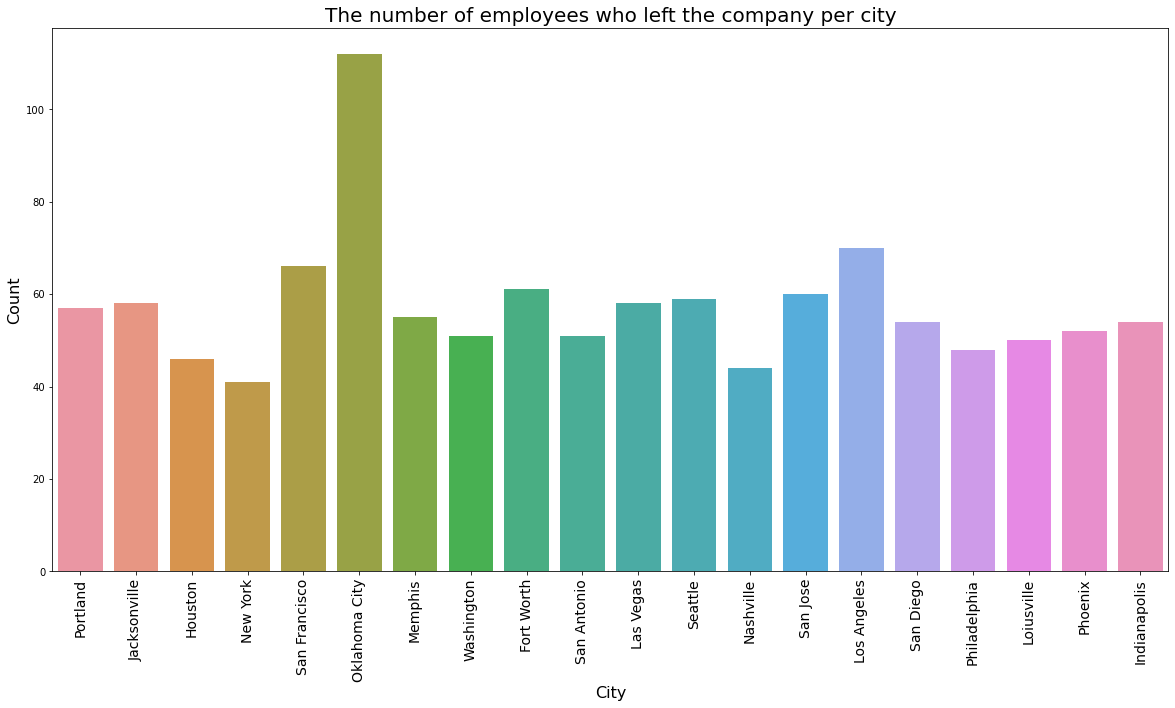

<Figure size 1440x720 with 0 Axes>

In [35]:
sns.countplot(data = dropped, x='City')
plt.title('The number of employees who left the company per city', fontsize=20)
plt.rcParams["figure.figsize"] = (20,10)
plt.xticks(rotation = 90, fontsize=14)
plt.xlabel('City',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show()
plt.clf()

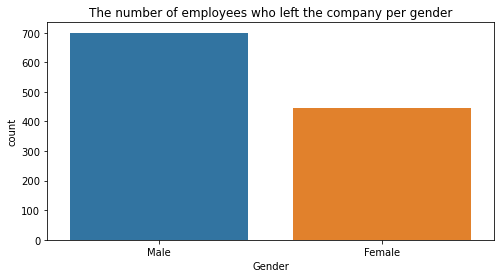

<Figure size 720x360 with 0 Axes>

In [45]:
sns.countplot(data = dropped, x='Gender')
plt.title('The number of employees who left the company per gender')
plt.rcParams["figure.figsize"] = (10,5)
plt.show()
plt.clf()

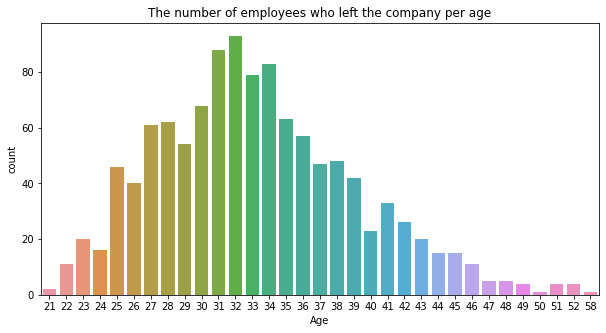

<Figure size 720x360 with 0 Axes>

In [46]:
sns.countplot(data = dropped, x='Age')
plt.title('The number of employees who left the company per age')
plt.rcParams["figure.figsize"] = (10,5)
plt.show()
plt.clf()

In [51]:
age_mean = dropped['Age'].mean()
print(age_mean)

33.26503923278117


In [52]:
age_median = dropped['Age'].median()
print(age_median)

33.0


In [55]:
salary_mean = dropped['Salary'].mean()
print(salary_mean)

55601.69311246731


In [58]:
salary_median = dropped['Salary'].median()
print(salary_median)

51764.0


In [59]:
salary_mode = dropped['Salary'].mode()
print(salary_mode)

0     27572.0
1     33042.0
2     37039.0
3     38619.0
4     38788.0
5     47651.0
6     54056.0
7     57225.0
8     59644.0
9     62292.0
10    63181.0
11    67667.0
12    69141.0
13    77903.0
14    82503.0
dtype: float64


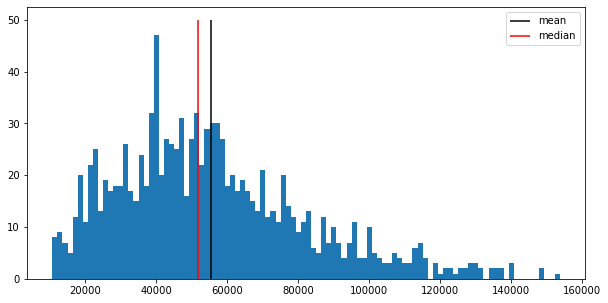

In [60]:
plt.hist(dropped['Salary'], bins=100)
plt.vlines(x = salary_mean, ymin = 0, ymax = 50, colors = 'k', label='mean')
plt.vlines(x = salary_median, ymin = 0, ymax = 50, colors = 'red', label='median')
plt.legend()
plt.show()

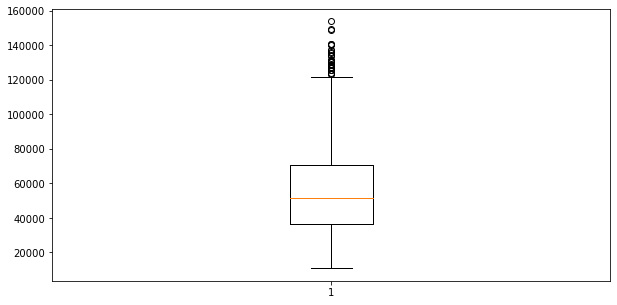

In [61]:
plt.boxplot(dropped['Salary'])
plt.show()